In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("gld_price_data.csv")
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
df.shape

(2290, 6)

In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
# Correlations positive or negative
correlation = df.corr()

<AxesSubplot:>

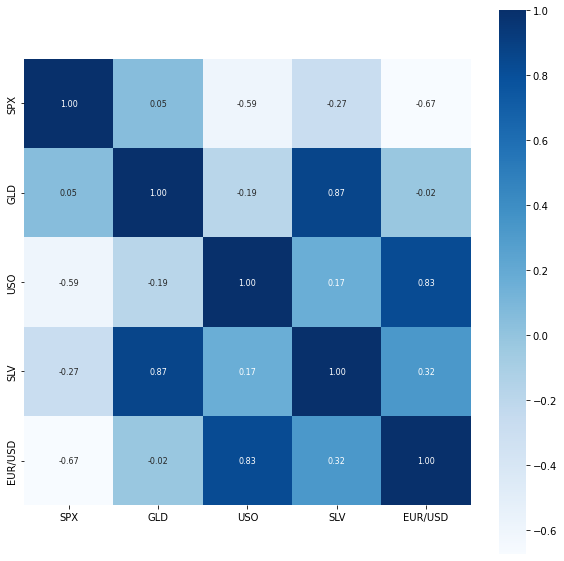

In [7]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')

In [8]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\amank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

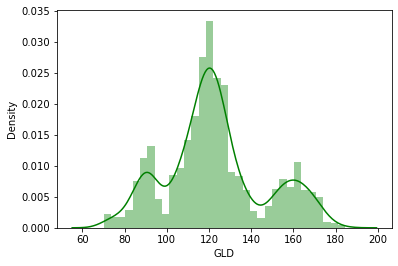

In [9]:
# check the distribution of the GLD Price
sns.distplot(df['GLD'],color='green')

In [10]:
# Splittind the X and Y
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [11]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [12]:
# Splitting into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [13]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [14]:
regressor = RandomForestRegressor(n_estimators=100)

In [15]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [16]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [32]:
print(test_data_prediction)

[113.50080019 148.69280156 140.40929836 112.58730168 113.76859947
  95.72379946 111.90569969  93.32389953 121.05460069 127.10839966
 147.97209951 120.58729883 119.23970037  88.22770089  96.16370013
  92.84329859 116.65850059  89.1662991  125.47320102 114.81410009
 119.56719936 152.69490186 122.78709782 120.11599996 171.3079999
 108.21809859 120.40570065  87.21399875  88.01420059  88.82239918
 121.3333008  154.44520192 151.16259796 125.97359975 126.60829995
  90.90869863 157.16229956 121.56280156 106.76910075 144.40359776
  92.59199969 127.65000112 117.55700112 152.78690112 119.50499952
  91.2914019   80.01689978 120.31080166 131.92560058 119.08029961
 127.37870044 166.02950021 153.23930046  92.58799994 148.65660085
 151.64379912 113.27450125 112.8900005   87.2634995  127.69859877
 125.27870046 151.98360237 114.47569985 110.60980022 161.31009732
 117.20799844 108.48910121 131.96289948 132.52930108 125.67860049
 116.96479993 149.51010169 156.18700121 168.9211956  109.93830004
 140.733297

In [33]:
print(Y_test)

[110.82, 151.050003, 137.660004, 113.07, 114.629997, 96.18, 110.459999, 95.120003, 121.25, 126.800003, 146.380005, 122.470001, 116.629997, 87.75, 95.989998, 92.730003, 115.690002, 89.18, 124.980003, 115.029999, 120.739998, 151.619995, 122.900002, 120.260002, 171.720001, 109.129997, 119.529999, 87.419998, 88.25, 90.610001, 121.309998, 154.190002, 151.440002, 128.229996, 126.720001, 90.800003, 167.320007, 120.959999, 105.900002, 143.809998, 92.290001, 127.589996, 116.75, 152.149994, 118.970001, 89.519997, 76.199997, 120.139999, 131.660004, 118.989998, 128.199997, 165.800003, 155.669998, 92.059998, 147.630005, 150.75, 114.290001, 111.540001, 87.379997, 127.959999, 124.769997, 151.619995, 113.639999, 110.879997, 161.539993, 119.779999, 107.519997, 129.869995, 131.679993, 125.980003, 115.480003, 150.410004, 155.360001, 168.710007, 110.739998, 141.630005, 102.269997, 113.75, 119.290001, 123.419998, 118.190002, 93.709999, 140.380005, 106.980003, 124.75, 92.059998, 131.919998, 126.410004, 127.

In [28]:
R2 = metrics.r2_score(Y_test, test_data_prediction)
print("R2 : ", R2)

R2 :  0.9878642696547709


In [29]:
y_test = Y_test
Y_test = list(Y_test)

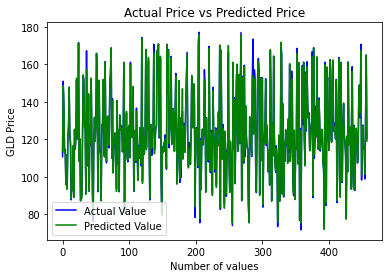

In [30]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

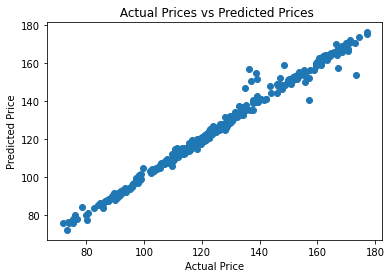

In [31]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [36]:
from sklearn.metrics import max_error
max_error(y_test, test_data_prediction)

20.38269557999996

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, test_data_prediction)

1.266690589039302

In [38]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, test_data_prediction)

0.9878870070241343